In [1]:
import pickle

# Path to data
base_path = './Data/Neuchatel_Ti64'

# Path to the segmented data
pickle_file_path = base_path + '/segmented_data_dict_Ti64.pkl'  

# Load the dictionary from the pickle file
with open(pickle_file_path, 'rb') as file:
    segmented_data_dict = pickle.load(file)

print('Loaded segmented_data_dict from file.')


Loaded segmented_data_dict from file.


In [2]:
def print_segmented_data_summary(segmented_data_dict):
    print("Summary of Segmented Data:")
    for key, tensor in segmented_data_dict.items():
        power, speed, cube_number = key
        print(f"Cube {cube_number}, Power: {power}W, Speed: {speed}mm/s - Tensor Size: {tensor.shape}")

# Call the summary function
print_segmented_data_summary(segmented_data_dict)


Summary of Segmented Data:
Cube 1, Power: 90W, Speed: 1050mm/s - Tensor Size: (7, 2, 2258)
Cube 1, Power: 90W, Speed: 800mm/s - Tensor Size: (8, 2, 2962)
Cube 1, Power: 120W, Speed: 1800mm/s - Tensor Size: (10, 2, 961)
Cube 1, Power: 120W, Speed: 1300mm/s - Tensor Size: (6, 2, 1917)
Cube 1, Power: 120W, Speed: 550mm/s - Tensor Size: (10, 2, 3838)
Cube 1, Power: 120W, Speed: 800mm/s - Tensor Size: (10, 2, 2731)
Cube 1, Power: 90W, Speed: 1300mm/s - Tensor Size: (10, 2, 1609)
Cube 1, Power: 105W, Speed: 1050mm/s - Tensor Size: (10, 2, 1991)
Cube 1, Power: 90W, Speed: 1550mm/s - Tensor Size: (10, 2, 1366)
Cube 1, Power: 105W, Speed: 1800mm/s - Tensor Size: (10, 2, 1173)
Cube 2, Power: 105W, Speed: 800mm/s - Tensor Size: (11, 2, 2720)
Cube 2, Power: 120W, Speed: 300mm/s - Tensor Size: (10, 2, 6969)
Cube 2, Power: 105W, Speed: 1300mm/s - Tensor Size: (10, 2, 1606)
Cube 2, Power: 120W, Speed: 1050mm/s - Tensor Size: (10, 2, 2003)
Cube 2, Power: 105W, Speed: 300mm/s - Tensor Size: (10, 2, 691

In [48]:
import numpy as np

# New dictionary to hold the reduced tensors
reduced_data_dict = {}

for key, tensor in segmented_data_dict.items():
    # Step 1: Reduce the tensor to (1, 2, M) using the median across the first axis
    median_tensor = np.median(tensor[2:,:,int(tensor.shape[-1]*0.1):int(tensor.shape[-1]*0.9)], axis=0, keepdims=True)
    
    # Step 2: Calculate the median and std along the last axis for the reduced tensor
    median_of_median = np.median(median_tensor, axis=-1, keepdims=True)
    std_dev = np.std(median_tensor, axis=-1, keepdims=True)
    
    
    # Combine the median of median and std_dev into a single tensor (1, 2, 2)
    combined_tensor = np.concatenate((median_of_median, std_dev), axis=-1)
    
    # Store in the new dictionary
    reduced_data_dict[key] = combined_tensor


In [49]:
print_segmented_data_summary(reduced_data_dict)


Summary of Segmented Data:
Cube 1, Power: 90W, Speed: 1050mm/s - Tensor Size: (1, 2, 2)
Cube 1, Power: 90W, Speed: 800mm/s - Tensor Size: (1, 2, 2)
Cube 1, Power: 120W, Speed: 1800mm/s - Tensor Size: (1, 2, 2)
Cube 1, Power: 120W, Speed: 1300mm/s - Tensor Size: (1, 2, 2)
Cube 1, Power: 120W, Speed: 550mm/s - Tensor Size: (1, 2, 2)
Cube 1, Power: 120W, Speed: 800mm/s - Tensor Size: (1, 2, 2)
Cube 1, Power: 90W, Speed: 1300mm/s - Tensor Size: (1, 2, 2)
Cube 1, Power: 105W, Speed: 1050mm/s - Tensor Size: (1, 2, 2)
Cube 1, Power: 90W, Speed: 1550mm/s - Tensor Size: (1, 2, 2)
Cube 1, Power: 105W, Speed: 1800mm/s - Tensor Size: (1, 2, 2)
Cube 2, Power: 105W, Speed: 800mm/s - Tensor Size: (1, 2, 2)
Cube 2, Power: 120W, Speed: 300mm/s - Tensor Size: (1, 2, 2)
Cube 2, Power: 105W, Speed: 1300mm/s - Tensor Size: (1, 2, 2)
Cube 2, Power: 120W, Speed: 1050mm/s - Tensor Size: (1, 2, 2)
Cube 2, Power: 105W, Speed: 300mm/s - Tensor Size: (1, 2, 2)
Cube 2, Power: 90W, Speed: 550mm/s - Tensor Size: (1,

In [50]:
def combine_cube_data(cubes_to_analyze, data_dict):
    combined_data_dict = {}
    
    for key, data in data_dict.items():
        power, speed, cube_number = key
        # Check if the current entry is from one of the cubes we're interested in
        if cube_number in cubes_to_analyze:
            # Use (power, speed) as the new key
            new_key = (power, speed)
            
            combined_data_dict[new_key] = data
            
    return combined_data_dict

In [126]:
cubes_data = combine_cube_data(cubes_to_analyze=[3,4], data_dict=reduced_data_dict)
cubes_data

{(90,
  1550): array([[[0.9123992 , 0.14478054],
         [1.5496065 , 0.086848  ]]]),
 (120,
  1300): array([[[0.8904267 , 0.11870927],
         [1.84303275, 0.08911371]]]),
 (90,
  1050): array([[[0.63293457, 0.08873127],
         [1.575241  , 0.06660465]]]),
 (120,
  300): array([[[0.28915405, 0.03931413],
         [1.841583  , 0.06620978]]]),
 (120,
  550): array([[[0.38013458, 0.03871808],
         [1.7632295 , 0.05235363]]]),
 (120,
  1050): array([[[0.82229615, 0.12580538],
         [1.90979025, 0.0778369 ]]]),
 (105,
  1800): array([[[1.22261   , 0.15210662],
         [1.667633  , 0.07816982]]]),
 (105,
  300): array([[[0.34706115, 0.05012794],
         [1.753807  , 0.07280007]]]),
 (90,
  800): array([[[0.51231385, 0.05256194],
         [1.595917  , 0.06234013]]]),
 (90,
  1300): array([[[0.89733125, 0.10911254],
         [1.63288125, 0.0786516 ]]]),
 (105,
  800): array([[[0.49785612, 0.06398674],
         [1.6872025 , 0.06536999]]]),
 (120,
  800): array([[[0.49797057, 0.053

In [127]:
def print_data_summary(segmented_data_dict):
    print("Summary of Segmented Data:")
    for key, tensor in segmented_data_dict.items():
        power, speed = key
        print(f"Power: {power}W, Speed: {speed}mm/s - Tensor Size: {tensor.shape}")

In [128]:
print_data_summary(cubes_data)


Summary of Segmented Data:
Power: 90W, Speed: 1550mm/s - Tensor Size: (1, 2, 2)
Power: 120W, Speed: 1300mm/s - Tensor Size: (1, 2, 2)
Power: 90W, Speed: 1050mm/s - Tensor Size: (1, 2, 2)
Power: 120W, Speed: 300mm/s - Tensor Size: (1, 2, 2)
Power: 120W, Speed: 550mm/s - Tensor Size: (1, 2, 2)
Power: 120W, Speed: 1050mm/s - Tensor Size: (1, 2, 2)
Power: 105W, Speed: 1800mm/s - Tensor Size: (1, 2, 2)
Power: 105W, Speed: 300mm/s - Tensor Size: (1, 2, 2)
Power: 90W, Speed: 800mm/s - Tensor Size: (1, 2, 2)
Power: 90W, Speed: 1300mm/s - Tensor Size: (1, 2, 2)
Power: 105W, Speed: 800mm/s - Tensor Size: (1, 2, 2)
Power: 120W, Speed: 800mm/s - Tensor Size: (1, 2, 2)
Power: 105W, Speed: 1050mm/s - Tensor Size: (1, 2, 2)
Power: 105W, Speed: 1550mm/s - Tensor Size: (1, 2, 2)
Power: 105W, Speed: 550mm/s - Tensor Size: (1, 2, 2)
Power: 90W, Speed: 300mm/s - Tensor Size: (1, 2, 2)
Power: 120W, Speed: 1800mm/s - Tensor Size: (1, 2, 2)
Power: 105W, Speed: 1300mm/s - Tensor Size: (1, 2, 2)
Power: 120W, S

In [129]:
import matplotlib.pyplot as plt

def plot_power_speed_data(combined_data_dict):
    # Extract unique power values
    unique_powers = sorted(set(power for (power, _) in combined_data_dict.keys()))
    
    # For each unique power, find all speeds and process data
    for power in unique_powers:
        # Filter keys by power and sort speeds
        speeds = sorted(speed for (p, speed) in combined_data_dict.keys() if p == power)
        
        # Data for plotting
        medians_channel_0 = []
        medians_channel_1 = []
        stds_channel_0 = []
        stds_channel_1 = []
        for speed in speeds:
            data = combined_data_dict[(power, speed)]
            # Data shape is (1, 2, 2), where last dim is [median, std]
            medians_channel_0.append(data[0, 0, 0])
            stds_channel_0.append(data[0, 0, 1])
            medians_channel_1.append(data[0, 1, 0])
            stds_channel_1.append(data[0, 1, 1])
        
        # Plotting
        fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
        fig.suptitle(f'Optical Data for Power = {power}W')
        
        axs[0].errorbar(speeds, medians_channel_0, yerr=stds_channel_0, fmt='-o', label='Channel 0: Emission')
        axs[1].errorbar(speeds, medians_channel_1, yerr=stds_channel_1, fmt='-o', color='r', label='Channel 1: Reflection')
        
        axs[0].set_xlabel('Speed (mm/s)')
        axs[0].set_ylabel('Median with STD')
        axs[0].legend()
        axs[1].set_xlabel('Speed (mm/s)')
        axs[1].legend()

        plt.show()




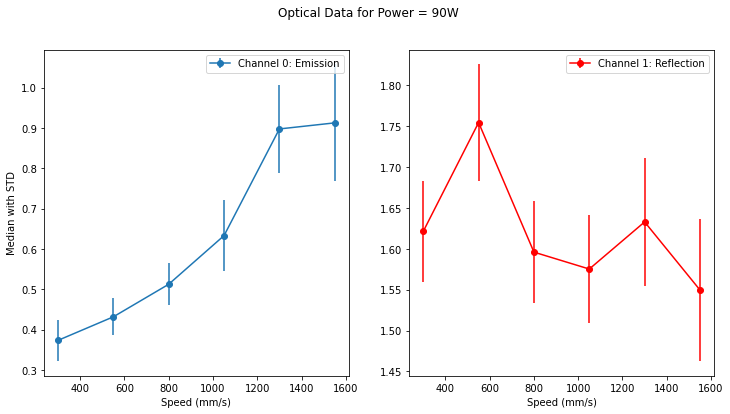

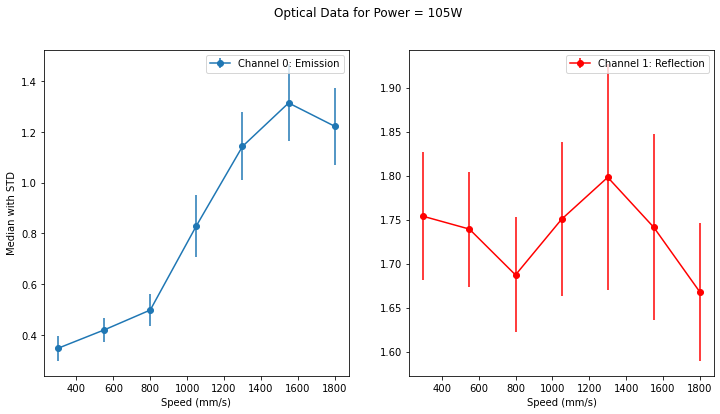

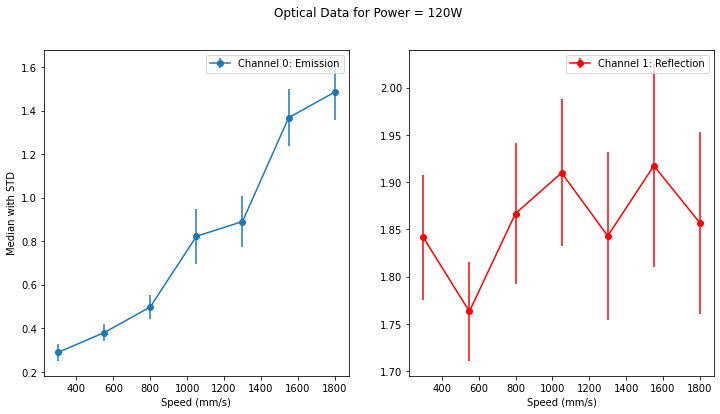

In [130]:
plot_power_speed_data(cubes_data)

In [131]:
import matplotlib.pyplot as plt
import numpy as np

def plot_power_speed_data(combined_data_dict):
    # Extract unique power values
    unique_powers = sorted(set(power for (power, _) in combined_data_dict.keys()))
    
    # For each unique power, find all speeds and process data
    for power in unique_powers:
        # Filter keys by power and sort speeds
        speeds = sorted(speed for (p, speed) in combined_data_dict.keys() if p == power)
        
         # Data for plotting
        medians_channel_0 = []
        medians_channel_1 = []
        stds_channel_0 = []
        stds_channel_1 = []
        for speed in speeds:
            data = cubes_data[(power, speed)]
            # Data shape is (1, 2, 2), where last dim is [median, std]
            medians_channel_0.append(data[0, 0, 0])
            stds_channel_0.append(data[0, 0, 1])
            medians_channel_1.append(data[0, 1, 0])
            stds_channel_1.append(data[0, 1, 1])

        # Plotting with two y-axes
        fig, ax1 = plt.subplots(figsize=(12, 6))
        fig.suptitle(f'Optical Data for Power = {power}W')

        color1 = 'tab:blue'
        ax1.set_xlabel('Speed (mm/s)')
        ax1.set_ylabel('Channel 0: Emission', color=color1)
        ax1.errorbar(speeds, medians_channel_0, yerr=stds_channel_0, fmt='-o', color=color1, label='Channel 0: Emission')
        ax1.tick_params(axis='y', labelcolor=color1)

        # Instantiate a second y-axis
        ax2 = ax1.twinx()
        color2 = 'tab:red'
        ax2.set_ylabel('Channel 1: Reflection', color=color2)
        ax2.errorbar(speeds, medians_channel_1, yerr=stds_channel_1, fmt='-o', color=color2, label='Channel 1: Reflection')
        ax2.tick_params(axis='y', labelcolor=color2)

        # Calculate derivatives
        derivatives_channel_1 = np.diff(medians_channel_1) / np.diff(speeds)

        # Find index where derivatives change sign
        change_index = np.where(np.diff(derivatives_channel_1) < 0)[0]
        if len(change_index) > 0:
            change_speed = speeds[change_index[0] + 2]  # Add 2 to account for double diff function
            ax1.axvline(x=change_speed, color='k', linestyle='--')  # Vertical line 

        # Optional: Add a legend or customize further
        fig.tight_layout()  # For layout adjustment

        plt.show()


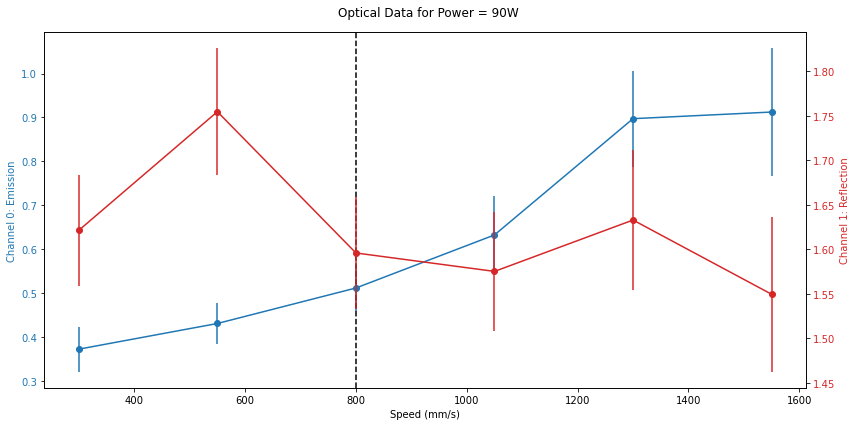

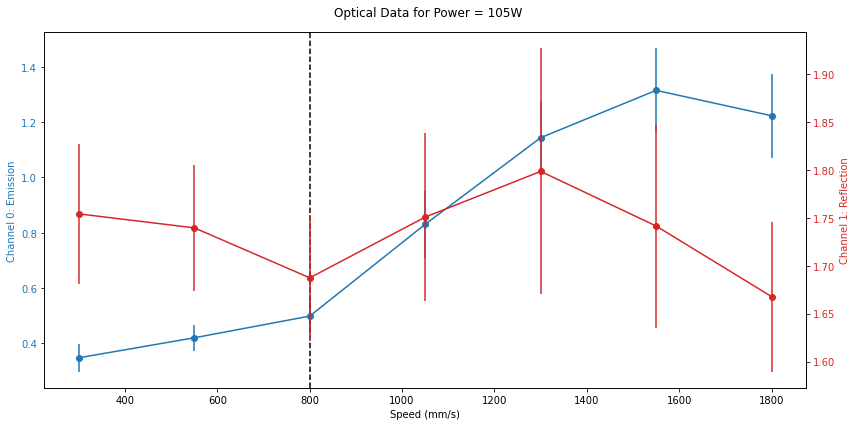

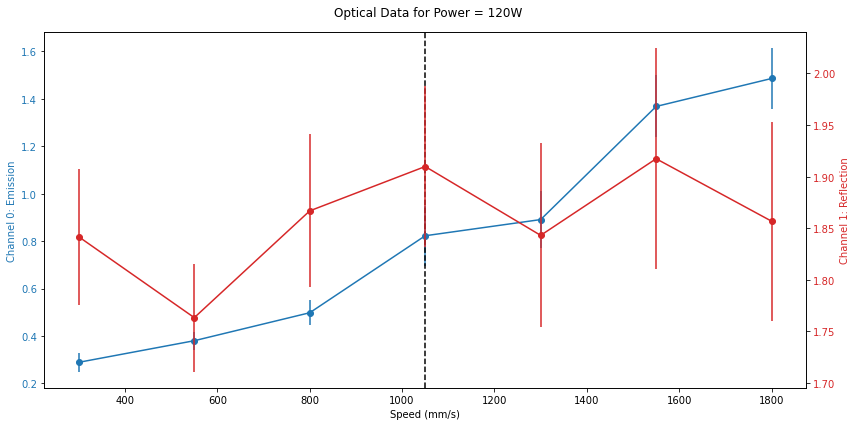

In [132]:
plot_power_speed_data(cubes_data)

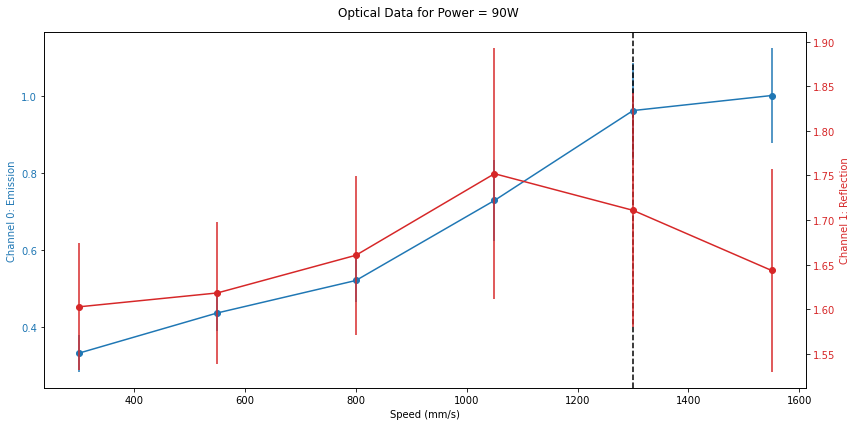

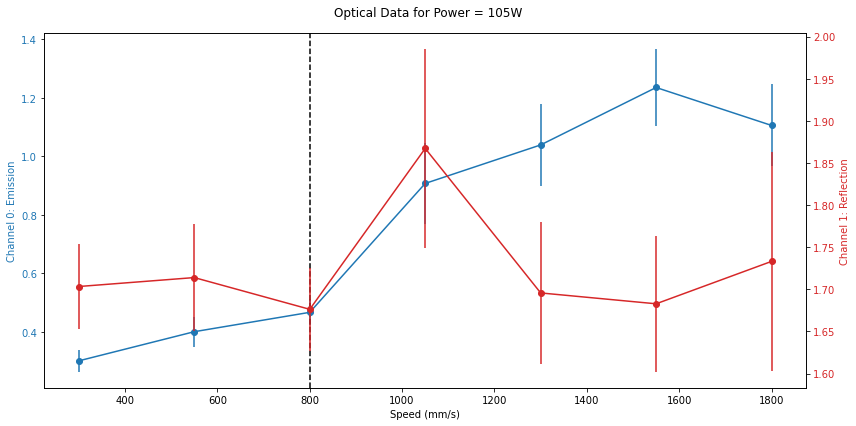

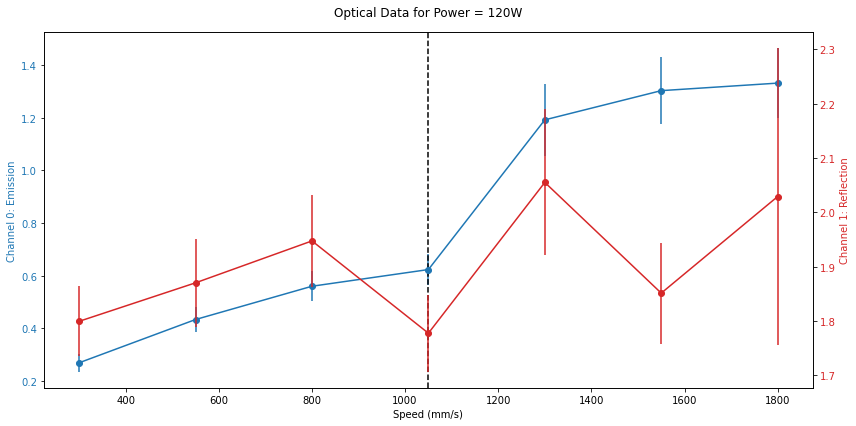

In [125]:
plot_power_speed_data(cubes_data)